In [2]:
#Usual Imports
import os
import sys
import time
import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Imports for web scraping Spotify data
from bs4 import BeautifulSoup
import urllib
import requests
from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from time import sleep
from collections import Counter

# **Billboard Top 100 Data 1958-2017**

In [3]:
#Read in datasets from Decibels & Decimals
billboard_data = pd.read_csv("all_charts.csv")
spotify_data = pd.read_csv("audio_features.csv")

C:\Users\MSI_USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
billboard_data.info()
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304643 entries, 0 to 304642
Data columns (total 30 columns):
Unnamed: 0     304643 non-null int64
chartDate      304643 non-null object
title          304643 non-null object
artist         304643 non-null object
peakPos        304643 non-null int64
lastPos        304643 non-null int64
weeks          304643 non-null int64
rank           304643 non-null int64
change         304643 non-null object
spotifyID      258820 non-null object
spotifyLink    258820 non-null object
videoLink      109357 non-null object
artist_list    258820 non-null object
track_name     258668 non-null object
art_0          258668 non-null object
art_1          27213 non-null object
art_2          5337 non-null object
art_3          1472 non-null object
art_4          353 non-null object
art_5          93 non-null object
art_6          34 non-null object
art_7          14 non-null object
art_8          11 non-null object
art_9          11 non-null object
art_10    

** For this project we only need the chartDate, title, artist, peakPos, lastPos, weeks, rank, change and 
 spotifyLink columns from billboard_data and the acousticness, danceability, duration_ms, energy, id,
 instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature and valence columns
 from the spotify_data **

In [5]:
billboard_sub = billboard_data[["chartDate","title","artist","peakPos","lastPos","weeks","rank","change","spotifyID"]]
spotify_sub = spotify_data[["acousticness", "danceability", "duration_ms", "energy", "id","instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature","valence"]]

In [6]:
# We merged the datasets from Decibels & Decimals together and create a new csv file
merged_data=pd.merge(billboard_sub,spotify_sub, how="outer",left_on="spotifyID",right_on="id")
merged_data.to_csv("all_spotify_data.csv")

# Read in the merged datasets from Decibels & Decimals 
https://github.com/dbfowler/billboard_volatility

** Create a subset of individual tracks search_data **

In [3]:
new_big_data=pd.read_csv("all_spotify_data.csv",encoding='latin1')
search_data=new_big_data.groupby(["title","artist"]).size().reset_index()

In [49]:
new_big_data.head(5)

,Unnamed: 0,chartDate,title,artist,peakPos,lastPos,weeks,rank,change,spotifyID,...,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,1958-08-16,Poor Little Fool,Ricky Nelson,1,1,11,1,0,33FPsMEl3UwpytDuyf9VYq,...,33FPsMEl3UwpytDuyf9VYq,0.0,0.0,0.134,-11.669,1.0,0.029,154.958,4.0,0.79
1,1,1958-08-23,Poor Little Fool,Ricky Nelson,1,1,11,4,-3,33FPsMEl3UwpytDuyf9VYq,...,33FPsMEl3UwpytDuyf9VYq,0.0,0.0,0.134,-11.669,1.0,0.029,154.958,4.0,0.79
2,2,1958-08-30,Poor Little Fool,Ricky Nelson,1,4,11,6,-2,33FPsMEl3UwpytDuyf9VYq,...,33FPsMEl3UwpytDuyf9VYq,0.0,0.0,0.134,-11.669,1.0,0.029,154.958,4.0,0.79
3,3,1958-09-06,Poor Little Fool,Ricky Nelson,1,6,11,5,+1,33FPsMEl3UwpytDuyf9VYq,...,33FPsMEl3UwpytDuyf9VYq,0.0,0.0,0.134,-11.669,1.0,0.029,154.958,4.0,0.79
4,4,1958-09-13,Poor Little Fool,Ricky Nelson,1,5,11,6,-1,33FPsMEl3UwpytDuyf9VYq,...,33FPsMEl3UwpytDuyf9VYq,0.0,0.0,0.134,-11.669,1.0,0.029,154.958,4.0,0.79


In [7]:
len(search_data)

27588

** There are 27588 distinct tracks in the Billboard Top 100 Data **

In [8]:
len(spotify_data)/len(search_data)*100

78.33478323908946

** We have Spotify Data for 78.33% of the tracks in the Billboard Top 100.**

In [17]:
audio_features=new_big_data[["title","artist","chartDate","peakPos","lastPos","weeks","rank","change","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness", "mode","speechiness","tempo","time_signature","valence"]]

# ** Audio Features of the tracks from Spotify **

In [14]:
audio_features.describe()

,peakPos,lastPos,weeks,rank,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,304643.000000,304643.000000,304643.000000,304643.000000,258820.000000,258808.000000,2.588200e+05,258820.000000,258820.000000,258820.000000,258820.000000,258820.000000,258820.000000,258808.000000,258820.000000,258781.000000,258808.000000
mean,30.760100,43.232797,13.902463,50.503392,0.270276,0.605626,2.286347e+05,0.632491,0.034109,5.224256,0.192357,-8.366804,0.729318,0.069378,120.303540,3.940718,0.604654
std,26.145309,30.145844,8.151371,28.866553,0.272556,0.151662,6.246360e+04,0.198102,0.139918,3.551212,0.164467,3.553880,0.444313,0.074781,28.090947,0.297135,0.236085
min,1.000000,0.000000,0.000000,1.000000,0.000001,0.078200,3.706700e+04,0.016700,0.000000,0.000000,0.013600,-29.110000,0.000000,0.021600,0.000000,1.000000,0.033500
25%,8.000000,16.000000,8.000000,26.000000,0.039800,0.505000,1.878670e+05,0.490000,0.000000,2.000000,0.089300,-10.623000,0.000000,0.032000,99.233000,4.000000,0.422000
50%,24.000000,42.000000,13.000000,51.000000,0.165000,0.616000,2.256670e+05,0.653000,0.000005,5.000000,0.130000,-7.822000,1.000000,0.040900,118.854000,4.000000,0.626000
75%,50.000000,69.000000,19.000000,76.000000,0.454000,0.712000,2.600670e+05,0.792000,0.000505,8.000000,0.249000,-5.636000,1.000000,0.065700,135.958000,4.000000,0.802000
max,100.000000,110.000000,87.000000,100.000000,0.995000,0.986000,1.367093e+06,0.998000,0.989000,11.000000,0.993000,2.291000,1.000000,0.898000,217.682000,5.000000,0.990000


# ** Scraping Lyrics Data:**
**We cycle through the rows in the search_data dataframe and scrape the lyric text for each track from different websites using  using predictable urls based on the artist and track names.**

In [ ]:
lyrics_data = pd.DataFrame()
lower_limit =0
upper_limit =27588
lyrics_table = 'lyrics-' +str(lower_limit)+"-"+ str(upper_limit)+'.csv'
start = time.time()
for row in range(lower_limit,upper_limit):
    artist_raw = search_data.iloc[row,1]
    artist_noand=artist_raw.replace(" &","").replace(". ","-").replace("Ã©","e").replace("$", "s")
    artist_array = re.split(r'.Featuring+', artist_noand) # Consider only the first listed artist
    track_raw=search_data.iloc[row,0]
    # Replace extended latin characters
    track_name=track_raw.replace("Ã\x83Â¶","oe").replace("Ã©","e").replace("ÃÂ©","e").replace("ÃÂ³",'o')
    track_name=track_name.replace("ÃÂ¡","a").replace("ÃÂ±","n").replace("Ã\x83â\x80\x9c","o").replace("ÃÂ¿DÃÂ²","do").replace("ÃÂ","a")
    track_name=re.sub(r'\&\s', '', track_name).replace("$", "s").replace("#","") # Replace certain characters
    track_name=re.sub(r'S\*\*t', 'Shit',track_name) # Replace profanity
    track_name=re.sub(r'\(|\)|\'|\|\.|\"|\,', '',track_name).lower() # Remove special characters
    # We now try to scrape five different lyrics sites using predictable urls based on the artist and track names.
    artist_first_letter=artist_array[0][0]
    # The formatting for lyricsmode.com 
    artist_mode = re.sub(r'\s|\.|-', '_',artist_array[0]).replace(",","").lower()
    track_mode = re.sub(r'\s', '_',track_name)
    # The track formatting for songlyrics.com and metrolyrics.com is the same.
    # The artist formatting is different if the band starts with "The ".
    artist_song = re.sub(r'\s|\.', '-',artist_array[0]).replace(",","").lower()
    track_songmetro = re.sub(r'\s', '-',track_name)
    track_az = re.sub(r'\s', '',track_name)  # The track formatting for azlyrics.com
    artist_mmatch = re.sub(r'.And', '',artist_array[0]) # The artist formatting for musixmatch.com
    artist_mmatch = re.sub(r'\s|\.', '-',artist_mmatch).replace(",","").lower()
    # The urls for bands that start with "The " are formatted differently.
    if artist_array[0].startswith("The "):
        the_array = re.split(r'The ',artist_array[0])
        artist_az = re.sub(r'\'|\s|\.|-|\,', '',the_array[1]).lower()
        artist_metro = re.sub(r'\.', '-',the_array[1]).replace(",","").replace(" ","-").lower()
    else:
        artist_az = re.sub(r'\'|\s|\.|-|\,', '',artist_array[0]).lower()
        artist_metro=artist_song
    # metrolyrics.com is inconsistent in whether it keeps "The " in the url so we have two possibilities.    
    url_metro_one = 'http://www.metrolyrics.com/'+track_songmetro+'-lyrics-'+artist_metro+'.html'
    url_metro_two = 'http://www.metrolyrics.com/'+track_songmetro+'-lyrics-'+artist_song+'.html'
    url_songlyrics = 'http://www.songlyrics.com/'+artist_song+'/'+track_songmetro+'-lyrics/'
    url_mode= 'http://www.lyricsmode.com/lyrics/'+artist_first_letter+'/'+artist_mode+'/'+track_mode+'.html'
    url_music_match = 'https://www.musixmatch.com/lyrics/' + artist_mmatch + '/' + track_songmetro
    url_azlyrics="http://www.azlyrics.com/lyrics/"+artist_az+"/"+track_az+".html"
    URLS=[url_metro_one,url_metro_two,url_songlyrics,url_mode, url_azlyrics, url_music_match]
    lyriclocations = ['lyrics-body-text', 'lyrics-body-text','songLyricsDiv','lyrics_text',"azlyrics",'mmatch']
    choice =""
    for u in range(0,len(URLS)):
        # We now cycle through each possbile url until we get a match.
        # We then scrape the lyric text from the website using beautiful soup.
        lyrics_request = urllib.request.Request(URLS[u],headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:52.0) Gecko/20100101 Firefox/52.0'})
        try:
            lyrics_web = urllib.request.urlopen(lyrics_request)
            lyrics_code = lyrics_web.read()
            soup = BeautifulSoup(lyrics_code, 'html.parser')
            if u==4:
                lyrics_array = soup.find_all("div", class_="")
            elif u == 5:
                lyrics_array = soup.find_all(class_="mxm-lyrics__content")
            else:
                lyrics_array = soup.find_all(id=lyriclocations[u])
            lyrics_text=""
            for lyrics in lyrics_array:
                lyrics_text += lyrics.get_text()
            # Some websites exist with no lyrics where the text is "\r\n ", "\r\r\n ", "\r\r\r\n ", or "\r\r\r\r\n " or "\n".
            if lyrics_text != "" and lyrics_text != "\r\n " and lyrics_text != "\n" and lyrics_text != "\r\r\n " and lyrics_text != "\r\r\r\n " and lyrics_text != "\r\r\r\r\n ":
                choice=u
                break
        except urllib.request.HTTPError as e:
            lyrics_text=""
            pass        
    add_frame = {"artist":artist_raw, "track": track_raw, "lyrics":lyrics_text, "source":choice}
    lyrics_data = lyrics_data.append(add_frame,ignore_index=True)
    # In order to not overwhelm the websites we have a delay of 45 seconds every 50 requests.
    if row%50==0 and row!=lower_limit and row!=upper_limit:
        sleep(45)
delta = time.time() - start
print ("features retrieved in %.2f seconds" % (delta,))
lyrics_data.to_csv(lyrics_table)

# ** Cleaning and Wrangling Step **:
** Due to the length of time taken to complete the previous step we create several csv files that must be joined together.**

In [ ]:
lyrics_all=pd.DataFrame()
lyrics_one = pd.read_csv('lyrics-0-100.csv',  encoding='latin1')
lyrics_two = pd.read_csv('lyrics-100-1000.csv',  encoding='latin1')
lyrics_all = pd.concat([lyrics_one,lyrics_two])
lyrics_new = pd.read_csv('lyrics-1000-1096.csv',  encoding='latin1')
lyrics_all = pd.concat([lyrics_all,lyrics_new])
# There are several more to join here until:
lyrics_new=pd.read_csv('lyrics-27587-27588.csv',encoding='latin1')
lyrics_all = pd.concat([lyrics_all,lyrics_new])

In [ ]:
# Now we create one file with all the lyric data
lyrics_merge=lyrics_all[["artist","lyrics","source","track"]].reset_index()
lyrics_merge.to_csv('all_lyrics.csv')

In [2]:
# This is our file containing all the scraped lyrics
billboard_lyrics = pd.read_csv("all_lyrics.csv",encoding='latin1')
lyrics_sub=billboard_lyrics[["artist","lyrics","source","track"]]

In [11]:
len(lyrics_sub[lyrics_sub.lyrics.notnull()])/len(lyrics_sub)*100

82.6047556908801

** We have lyric data for 82.60% of the tracks in the Billboard Top 100. **

In [12]:
# Here is the breakdown by source:
source_data=pd.DataFrame()
lyrics_count = len(lyrics_sub[lyrics_sub.source ==0])+len(lyrics_sub[lyrics_sub.source==1])
source_data = source_data.append({"source":"metrolyrics.com","lyrics count":lyrics_count},ignore_index=True)
lyrics_sources = ["songlyrics.com","lyricsmode.com","azlyrics.com","musixmatch.com"] 
for u in range(0,len(lyrics_sources)):
    lyrics_count = len(lyrics_sub[lyrics_sub.source ==u+2])
    source_data = source_data.append({"source":lyrics_sources[u],"lyrics count":lyrics_count},ignore_index=True)
source_data

,lyrics count,source
0,14527.0,metrolyrics.com
1,6594.0,songlyrics.com
2,1650.0,lyricsmode.com
3,6.0,azlyrics.com
4,12.0,musixmatch.com


# One of our goals with the lyric data is to quantify a "lyrical sentiment" feature of the songs. This is accomplished by the following steps:

# 1. Create a list of positive and negative adjective words 
We use a list of English sentiment words taken from https://dreference.blogspot.com/2016/09/positive-ve-words-and-adjectives-list.html

In [ ]:
posi=pd.read_csv("posi.txt")
plist=list(posi.values.flatten())
plist = [x.lower() for x in plist]
plist.append('abiding')
negi=pd.read_csv("neg.txt")
nlist=list(negi.values.flatten())
nlist = [x.lower() for x in nlist]
nlist.append('abandoned')

# 2. Next for each song we make a count of the distinct words in the lyrics

In [3]:
lyrics_list=billboard_lyrics[billboard_lyrics.lyrics.notnull()].reset_index()
lower_limit =0
upper_limit =len(lyrics_list)
common_words = pd.DataFrame()
rgx = re.compile("(\w[\w']*\w|\w)")
for row in range(lower_limit,upper_limit):
    song_lyrics=lyrics_list.get_value(row,"lyrics")
    words = rgx.findall(song_lyrics)
    word_list = [word.lower() for word in words] 
    word_counts = Counter(word_list)
    add_frame = {"artist":lyrics_list.get_value(row,"artist"), "track":lyrics_list.get_value(row,"track"), "lyrics":song_lyrics,"common words":word_counts.most_common()}
    common_words = common_words.append(add_frame,ignore_index=True)

# ** 3. Create a measure of "lyrical sentiment" based on the amount of words in the lyrics that are also in the positive and negative word lists.**
** We do this by first setting a neutral song a sentiment value of zero. Then for every song we cycle through the unique words in the lyrics and ADD by the number of occurances if the word is in the positive word list or SUBTRACT by the number of occurances if the word is in the negative word list. Then we scale this by the total word count for the song to obtain a value between -1 and 1.**

In [ ]:
sentiment_data=pd.DataFrame()
for row in range(0,len(common_words)):
    the_word_count=common_words.get_value(row,"common words")
    positivity=0
    total_words=0
    for word in the_word_count:
        total_words+=word[1]
        if word[0] in plist:
            positivity += word[1]
        elif word[0] in nlist:
             positivity -=word[1]
    add_frame = {"artist":common_words.get_value(row,"artist"), "track":common_words.get_value(row,"track"), "lyrics":common_words.get_value(row,"lyrics"),"positivity":positivity/total_words, 'common_words':common_words.get_value(row,"common words")}
    sentiment_data = sentiment_data.append(add_frame,ignore_index=True)

In [ ]:
sentiment_data.to_csv("sentiment_data.csv")

In [5]:
sentiment_data = pd.read_csv("sentiment_data.csv", encoding='latin1')

# What are the ten most "positive" and ten most "negative" songs?

In [7]:
sentiment_data.sort_values(by="positivity",ascending=False).head(10)

,Unnamed: 0,artist,common_words,lyrics,positivity,track
6109,6109,Brooklyn Bounce,"[('get', 24), ('bounce', 19), ('ready', 18), (...",These are the sounds of Brooklyn Bounce\r\r\r\...,0.585106,Get Ready To Bounce
11162,11162,El Coco,"[('get', 16), ('it', 16), (""let's"", 8), ('toge...","Let's get it, get it together\r\r\r\r\r\nLet's...",0.470588,Lets Get It Together
8477,8477,The Sunrays,"[('sun', 75), ('the', 9), ('and', 7), ('go', 6...",Go! \r\r\r\r\r\nSun sun sun sun\r\r\r\r\r\nSun...,0.430851,I Live For The Sun
6044,6044,Iconz Featuring Tony Manshino,"[('get', 9), ('crunked', 9), ('up', 9), ('comi...",Iconz\r\r\r\r\r\nMiscellaneous\r\r\r\r\r\nGet ...,0.418605,Get Crunked Up
7448,7448,Kool & The Gang,"[('high', 101), ('liftin', 40), ('higher', 16)...","\r\r\r\r\r\nHigher, higher\r\r\r\r\r\nHigher, ...",0.412245,Higher Plane
9248,9248,Wilson Pickett,"[('love', 60), (""i'm"", 12), ('in', 12), ('i', ...","\r\r\r\r\r\nI'm in love, yes, I am\r\r\r\r\r\n...",0.409357,I'm In Love
21361,21361,Esther Phillips,"[('love', 73), ('in', 35), (""i'm"", 21), ('i', ...","\r\r\r\r\r\nI'm in love, yes I am\r\r\r\r\r\nI...",0.393519,When A Woman Loves A Man
1032,1032,Aretha Franklin,"[('love', 73), ('in', 35), (""i'm"", 21), ('i', ...","\r\r\r\r\r\nI'm in love, yes I am\r\r\r\r\r\nI...",0.393519,Angel
13285,13285,Petula Clark,"[('love', 41), ('natural', 33), (""it's"", 16), ...",\r\r\r\r\r\nNatural love (natural love)\r\r\r\...,0.388889,Natural Love
5171,5171,David Ruffin,"[('love', 94), (""everything's"", 41), ('coming'...",Love is a flower that blooms\r\r\r\r\r\nIn the...,0.385475,Everything's Coming Up Love


In [8]:
sentiment_data.sort_values(by="positivity").head(10)

,Unnamed: 0,artist,common_words,lyrics,positivity,track
834,834,Jon Bellion,"[('low', 84), ('lie', 17), ('i', 11), ('that',...","\r\r\r\r\r\nI, was the knight in shining armor...",-0.292683,All Time Low
3546,3546,Kiss,"[('crazy', 48), ('are', 16), ('these', 7), ('n...","\r\r\r\r\r\nPeople try to take my soul away, b...",-0.200935,Crazy Crazy Nights
10960,10960,Dazz Band,"[('down', 11), ('let', 9), ('it', 9), ('all', ...",\r\r\r\r\r\nLet it all blow. Heave-ho heave-ho...,-0.196429,Let It All Blow
19859,19859,Color Me Badd,"[('so', 49), ('bad', 48), ('time', 39), ('chan...",(Time)\r\r\r\r\r\n(Chance)\r\r\r\r\r\n(Time)\r...,-0.192683,Time And Chance
5649,5649,Dee Dee Warwick,"[('crazy', 22), ('foolish', 20), ('she', 10), ...",Foolish.Foolish... Foolish... Foolish... Foooo...,-0.188889,Foolish Fool
15811,15811,Barbara Mason,"[('sad', 32), ('you', 19), ('girl', 15), ('ove...","Sad, sad, girl (sad girl)\r\r\r\r\r\n\r\r\r\r\...",-0.183432,"Sad, Sad Girl"
4802,4802,Sean Kingston,"[('dumb', 90), ('you', 23), ('b', 20), ('wh', ...","\r\r\r\r\r\nGirl you make me dumb, dumb, dumb,...",-0.177500,Dumb Love
1704,1704,Sean Kingston Featuring Chris Brown & Wiz Khalifa,"[('beat', 125), ('it', 43), ('you', 22), ('me'...","\r\r\r\r\r\nHe ain't fly though, he don't even...",-0.174520,Beat It
14518,14518,The Doors,"[(""you're"", 18), ('when', 16), ('strange', 11)...",\r\r\r\r\r\nPeople are strange when you're a s...,-0.168317,People Are Strange
13889,13889,Jack Scott,"[('little', 22), ('one', 22), ('oh', 18), ('i'...",Oh little one (oh little one)\r\r\r\r\r\nOh li...,-0.166667,"Oh, Little One"


# We now join the lyrical data to the spotify data in one chart

In [40]:
sent_join=sentiment_data[["common_words","positivity"]]
lyric_join=billboard_lyrics[["artist","lyrics","track"]]
lyrics_to_merge=pd.concat([sent_join,lyric_join],axis=1)
merged_data=pd.merge(new_big_data,lyrics_to_merge, how="outer",left_on=["artist","title"],right_on=["artist","track"])
all_data=merged_data[["chartDate","title","artist","peakPos","lastPos","weeks","rank","change","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence","lyrics","common_words","positivity"]]
all_data.to_csv("billboard_spotify_lyrics.csv")

In [4]:
all_data=pd.read_csv("billboard_spotify_lyrics.csv", encoding='latin1')

In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304643 entries, 0 to 304642
Data columns (total 25 columns):
Unnamed: 0          304643 non-null int64
chartDate           304643 non-null object
title               304643 non-null object
artist              304643 non-null object
peakPos             304643 non-null int64
lastPos             304643 non-null int64
weeks               304643 non-null int64
rank                304643 non-null int64
change              304643 non-null object
acousticness        258820 non-null float64
danceability        258808 non-null float64
duration_ms         258820 non-null float64
energy              258820 non-null float64
instrumentalness    258820 non-null float64
key                 258820 non-null float64
liveness            258820 non-null float64
loudness            258820 non-null float64
mode                258820 non-null float64
speechiness         258808 non-null float64
tempo               258820 non-null float64
time_signature      258

How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story

        Get going by asking the following questions and looking for the answers with some code and plots:

            Can you count something interesting?

            Can you find some trends (high, low, increase, decrease, anomalies)?

            Can you make a bar plot or a histogram?

            Can you compare two related quantities?

            Can you make a scatterplot?

            Can you make a time-series plot?

        Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

        By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

    The questions you asked
    The trends you investigated
    The resulting visualizations and conclusions.

In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.

** We create a year column since it will be easier to see the trends over time. Note that we may also want to plot trends by week as well. **

In [5]:
year = all_data.chartDate.replace({'-': ''}, regex=True)
year = year.apply(np.float)
year = year//10000
pd.set_option('precision', 0)
year=year.rename("year")


# **Note: Here we have two options. **
** We can either subset so every track is represented just once or we could not subset so that tracks that spent more time in the Top 100 have more influence. We make two dataframes. **

In [6]:
year_data=pd.concat([all_data,year],axis=1)
year_data_sub=year_data[year_data.lastPos==0]

In [7]:
len(year_data_sub)

28617

** Note that this is slightly larger than the list of unique tracks used to search for lyrics there are several hundred songs charting in two different years. **

In [8]:
audio_means =year_data.groupby(["year"]).mean().reset_index()
audio_means_sub =year_data_sub.groupby(["year"]).mean().reset_index()

In [174]:
audio_means.head(10)

,year,Index,peakPos,lastPos,weeks,rank,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,positivity
0,1958,41870,30,39,12,50,7e-01,6e-01,148679,5e-01,7e-02,5,2e-01,-11,9e-01,5e-02,115,4,7e-01,6e-02
1,1959,44542,31,41,13,50,7e-01,5e-01,150425,5e-01,9e-02,5,2e-01,-11,9e-01,5e-02,117,4,7e-01,6e-02
2,1960,49778,30,41,12,50,7e-01,5e-01,153845,5e-01,7e-02,5,2e-01,-11,9e-01,5e-02,119,4,7e-01,6e-02
3,1961,53191,31,40,10,51,7e-01,5e-01,154771,5e-01,8e-02,5,2e-01,-11,9e-01,5e-02,121,4,7e-01,6e-02
4,1962,54432,32,40,11,50,6e-01,5e-01,158428,5e-01,7e-02,5,2e-01,-11,9e-01,6e-02,120,4,7e-01,6e-02
5,1963,58540,33,41,10,50,6e-01,5e-01,155608,5e-01,5e-02,5,2e-01,-10,8e-01,5e-02,118,4,7e-01,6e-02
6,1964,60390,35,41,9,50,5e-01,5e-01,155861,5e-01,5e-02,5,2e-01,-10,8e-01,5e-02,121,4,7e-01,5e-02
7,1965,66105,34,42,9,50,5e-01,5e-01,161800,5e-01,5e-02,5,2e-01,-10,8e-01,5e-02,121,4,6e-01,5e-02
8,1966,69582,34,42,9,50,4e-01,5e-01,165868,5e-01,5e-02,5,2e-01,-10,8e-01,5e-02,120,4,7e-01,6e-02
9,1967,70652,35,41,9,50,4e-01,5e-01,172681,5e-01,4e-02,5,2e-01,-10,8e-01,5e-02,119,4,6e-01,6e-02


In [175]:
audio_means_sub.head(10)

,year,Index,peakPos,lastPos,weeks,rank,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,positivity
0,1958,39349,52,,8,84,7e-01,5e-01,148136,5e-01,9e-02,5,2e-01,-11,9e-01,5e-02,115,4,7e-01,6e-02
1,1959,42799,49,,9,86,7e-01,5e-01,149227,5e-01,8e-02,5,2e-01,-11,9e-01,5e-02,115,4,7e-01,5e-02
2,1960,47754,49,,9,87,7e-01,5e-01,153435,4e-01,7e-02,5,2e-01,-11,9e-01,5e-02,118,4,7e-01,6e-02
3,1961,49807,49,,8,87,7e-01,5e-01,153954,5e-01,7e-02,5,2e-01,-11,9e-01,5e-02,120,4,7e-01,6e-02
4,1962,52170,52,,8,88,6e-01,5e-01,158169,5e-01,8e-02,5,2e-01,-11,9e-01,6e-02,118,4,7e-01,5e-02
5,1963,55504,51,,8,88,6e-01,5e-01,156416,5e-01,6e-02,5,2e-01,-10,8e-01,5e-02,120,4,7e-01,6e-02
6,1964,57602,51,,7,87,5e-01,5e-01,157005,5e-01,6e-02,5,2e-01,-10,8e-01,5e-02,121,4,7e-01,5e-02
7,1965,63281,48,,7,87,5e-01,5e-01,162947,5e-01,5e-02,5,2e-01,-10,8e-01,5e-02,120,4,6e-01,5e-02
8,1966,65410,49,,7,87,5e-01,5e-01,165920,5e-01,5e-02,5,2e-01,-10,8e-01,5e-02,121,4,7e-01,6e-02
9,1967,67756,50,,7,86,4e-01,5e-01,173363,5e-01,4e-02,5,2e-01,-10,8e-01,5e-02,119,4,6e-01,5e-02


# ** We plot lyrical sentiment over time.**

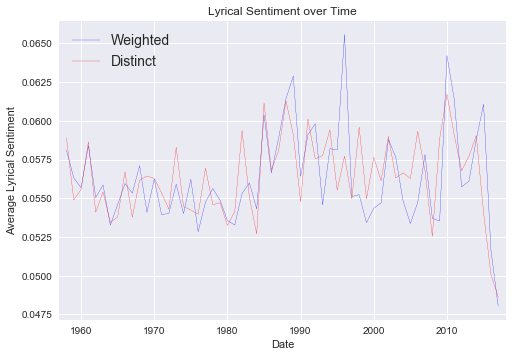

In [135]:
plt.plot(audio_means.year, audio_means.positivity, color="blue", linewidth=0.25, label="Weighted")
plt.plot(audio_means_sub.year, audio_means_sub.positivity, color="red", linewidth=0.25, label="Distinct")
plt.xlabel('Date')
plt.ylabel('Average Lyrical Sentiment')
plt.title('Lyrical Sentiment over Time')
plt.legend(loc='upper left',prop={'size':14})
plt.xlim([1957,2018])
plt.show()

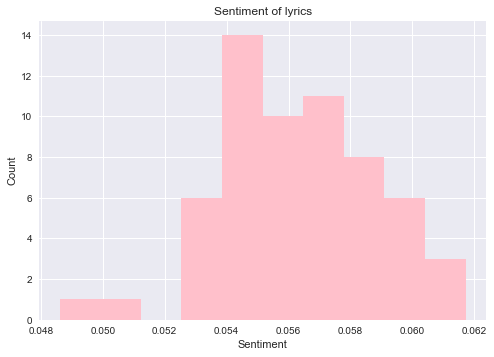

In [9]:
plt.hist(audio_means_sub.positivity, color="pink")
plt.xlabel("Sentiment")
plt.ylabel('Count')
plt.title('Sentiment of lyrics')
plt.show()

** Note that a value of zero indicates a neutral song so throughout the history of the Billboard Top 100 the average song has been slightly positive. It appears like recently the average sentiment has decreased but the magnitude of the change is still quite small. **

** The two lines follow roughly the same trends with a few instances where the continued presence of several songs had a noticeable impact. **

# What is the most popular key?

In [25]:
key_data=year_data.groupby(["key","mode"]).count().reset_index().sort_values(by="chartDate",ascending=False)
key_data_sub=year_data_sub.groupby(["key","mode"]).count().reset_index().sort_values(by="chartDate",ascending=False)

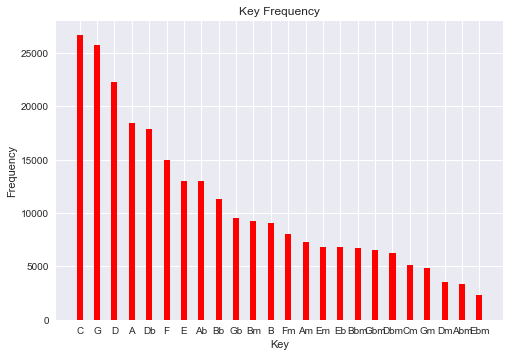

In [34]:
key_list=["C","G","D","A","Db","F","E","Ab","Bb","Gb","Bm","B","Fm","Am","Em","Eb","Bbm","Gbm","Dbm","Cm","Gm","Dm","Abm","Ebm"]   
y_pos = np.arange(len(key_list))
plt.bar(y_pos, key_data.chartDate, width,color="red")
plt.xticks(y_pos,key_list)
plt.xlabel("Key")
plt.ylabel('Frequency')
plt.title('Key Frequency')
plt.show()


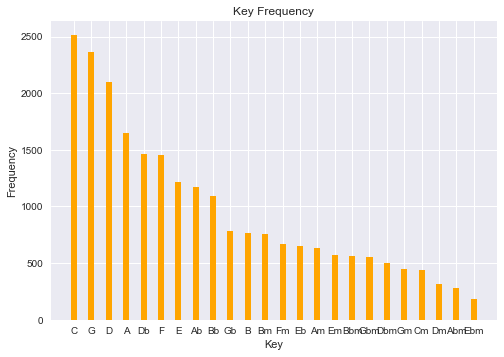

In [35]:
key_list_sub=["C","G","D","A","Db","F","E","Ab","Bb","Gb","B","Bm","Fm","Eb","Am","Em","Bbm","Gbm","Dbm","Gm","Cm","Dm","Abm","Ebm"]   
y_pos = np.arange(len(key_list)) 
plt.bar(y_pos, key_data_sub.chartDate, width,color="orange",label="Subset by Track")
plt.xticks(y_pos,key_list_sub)
plt.xlabel("Key")
plt.ylabel('Frequency')
plt.title('Key Frequency')
plt.show()

** We see that most popular songs are in the key of C major closely followed by G major. **

** Note that this differs slightly from the analysis of all songs on Spotify which found that the most popular key is G major. ** 

https://insights.spotify.com/us/2015/05/06/most-popular-keys-on-spotify/ 

# What is the most common time signature?

In [161]:
time_data=year_data.groupby(["time_signature"]).count().reset_index().sort_values(by="Index",ascending=False)
time_data_sub=year_data_sub.groupby(["time_signature"]).count().reset_index().sort_values(by="Index",ascending=False)

In [170]:
time_data["percent"]=time_data.Index/len(year_data[year_data.time_signature.notnull()])

In [171]:
time_data

,time_signature,Index,chartDate,title,artist,peakPos,lastPos,weeks,rank,change,...,loudness,mode,speechiness,tempo,valence,lyrics,common_words,positivity,year,percent
2,4,241696,241696,241696,241696,241696,241696,241696,241696,241696,...,241696,241696,241696,241696,241696,223180,199930,199930,241696,9e-01
1,3,14545,14545,14545,14545,14545,14545,14545,14545,14545,...,14545,14545,14545,14545,14545,12848,11396,11396,14545,6e-02
3,5,1706,1706,1706,1706,1706,1706,1706,1706,1706,...,1706,1706,1706,1706,1706,1500,1444,1444,1706,7e-03
0,1,834,834,834,834,834,834,834,834,834,...,834,834,834,834,834,748,737,737,834,3e-03


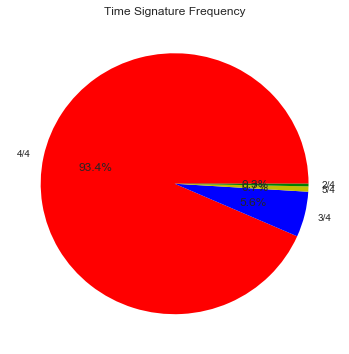

In [173]:
times = time_data.percent
colors = ['r','b' , 'y', 'g']
labels_time = ["4/4", "3/4", "5/4","2/4"]
fig, ax = plt.subplots(figsize=(6, 6))  # make the plot square
pie = ax.pie(times, colors=colors, labels=labels_time,autopct='%1.1f%%')
plt.title('Time Signature Frequency')
plt.show()

** Here we see that the vast majority of songs on the Billboard Top 100 are written in 4/4 Time. **

In [ ]:
# **Is D minor really the saddest of all keys? **
** Reference: ** https://www.youtube.com/watch?v=H7vk5keNbRc

** Here we are making the assumption that sad songs are associated with a negative sentiment since words like "sad", "down" or "heartbroken" are in the negative sentiment word list. **

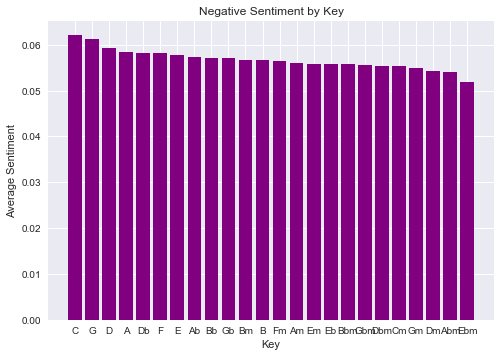

In [186]:
negative_songs = year_data_sub.groupby(["key","mode"]).mean().reset_index().sort_values(by="positivity",ascending=False)
y_pos = np.arange(len(key_list))
plt.bar(y_pos, negative_songs.positivity, color="purple")
plt.xticks(y_pos,key_list)
plt.xlabel("Key")
plt.ylabel('Average Sentiment')
plt.title('Negative Sentiment by Key')
plt.show()

 ** Note that the rankings of the keys looks incredibly similar to the ranking by frequency. **

** Let's check. **

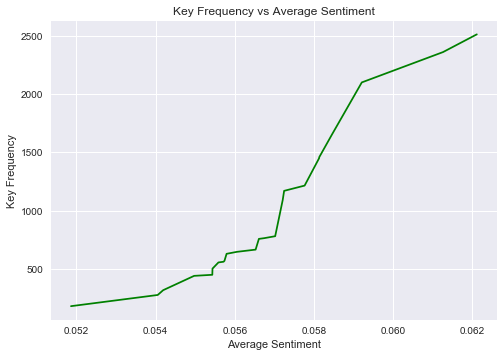

In [189]:
plt.plot(negative_songs.positivity,key_data_sub.Index, color="green")
plt.xlabel("Average Sentiment")
plt.ylabel('Key Frequency')
plt.title('Key Frequency vs Average Sentiment')
plt.show()

** Somewhat remarkably we have perfect agreement between the frequency of keys in popular songs and the average sentiment of the lyrics by key with the more popular keys being associated with a more positive sentiment. Note that Ebm has the lowest average sentiment and also lowest distribution but Dm comes close at third lowest. **

# What are the most common distinctive words each year?

**Note here we remove the top 100 most common words in the English language taken from Wikipedia as well as several other common words that come from contractions and slang. **

In [32]:
common_list=pd.read_csv("common_words.txt")
common_list=list(common_list.values.flatten())
common_list = [x.lower() for x in common_list]

** Common Words **

In [33]:
common_list.sort()
common_list

['a',
 'about',
 'after',
 'all',
 'also',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'back',
 'be',
 'because',
 'but',
 'by',
 'can',
 "can't",
 'cause',
 'come',
 'could',
 'day',
 'do',
 "don't",
 'even',
 'first',
 'for',
 'from',
 'get',
 'give',
 'go',
 'good',
 'got',
 'have',
 'he',
 'her',
 'him',
 'his',
 'how',
 'i',
 "i'll",
 "i'm",
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'just',
 'know',
 'let',
 'like',
 'look',
 'make',
 'me',
 'most',
 'my',
 'new',
 'no',
 'not',
 'now',
 'of',
 'on',
 'one',
 'only',
 'or',
 'other',
 'our',
 'out',
 'over',
 'people',
 'say',
 'see',
 'she',
 'so',
 'some',
 'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'think',
 'this',
 'time',
 'to',
 'two',
 'up',
 'us',
 'use',
 'want',
 'was',
 'way',
 'we',
 'well',
 'what',
 'when',
 'which',
 'who',
 'will',
 'with',
 'work',
 'would',
 'year',
 'you',
 "you're",
 'your']

In [6]:
year = all_data.chartDate.replace({'-': ''}, regex=True)
year = year.apply(np.float)
year = year//10000
pd.set_option('precision', 0)
year=year.rename("year")
all_year=pd.concat([all_data,year],axis=1)
chart_year=all_year.groupby(["title","artist","lyrics","year"]).count().reset_index()
chart_sub=pd.merge(common_words,chart_year,left_on=["track","artist"],right_on=["title","artist"],how="outer")
chart_sub=chart_sub[["artist","common words","title","year"]].sort_values(by="year")

In [ ]:
# We ignore 2017 since we only have data for the first couple weeks.
yearly_common_words=pd.DataFrame()
year_min=int(chart_sub.year.min())
year_max=int(chart_sub.year.max())
year_current=year_min
j=0
year_count = Counter()
while year_current<=year_max:
    year_check=chart_sub.iloc[j,3]
    if year_check==year_current:
        list_length=len(chart_sub.iloc[j,1])
        for i in range(0,list_length):
            year_count[chart_sub.iloc[j,1][i][0]] += 1        
    else:
        add_frame={"year":year_current,"common_words":year_count.most_common()}
        year_count = Counter()
        year_current+=1
        yearly_common_words=yearly_common_words.append(add_frame,ignore_index=True)
    j+=1

In [28]:
# We see that the most common words are of course also in the list of most common words in the English language so we 
# search for the most common distinctive words.
yearly_common_words.head(5)
yearly_common_words.to_csv("yearly_common_words.csv")

In [34]:
distinct_words=pd.DataFrame()
for i in range(0,len(yearly_common_words)):
    j=0
    word_list=[]
    while len(word_list)<=5:
        word_test=yearly_common_words.iloc[i,0][j][0]
        if word_test in common_list:
            j+=1
        else:
            word_list.append(word_test)
            j+=1
    add_frame={"year":yearly_common_words.iloc[i,1],"word1":word_list[0],"word2":word_list[1],"word3":word_list[2],"word4":word_list[3],"word5":word_list[4]}
    distinct_words=distinct_words.append(add_frame,ignore_index=True)

In [35]:
distinct_words

,word1,word2,word3,word4,word5,year
0,love,heart,oh,little,night,1958
1,love,oh,heart,night,little,1959
2,love,oh,heart,never,down,1960
3,love,oh,heart,never,baby,1961
4,love,oh,heart,never,tell,1962
5,love,oh,heart,baby,never,1963
6,love,oh,heart,down,never,1964
7,love,oh,baby,heart,never,1965
8,love,baby,oh,never,girl,1966
9,love,oh,baby,down,never,1967


** Note that "love" (on the positive sentiment list) was the most common distinct word from 1958-2004 and has never left the top two position. However "down" (on the negative sentiment list) is usually close which explains why the average sentiment for each year is slightly positive. **